# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [ ]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [ ]:
df = pd.read_csv("data/AviationData_cleaned.csv")

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [22]:
small_planes = df[df["Total.Passengers"] <= 20].copy()
large_planes = df[df["Total.Passengers"] > 20].copy()

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

Text(0.5, 1.0, 'Large Planes - 15 Lowest Mean Injury Rate')

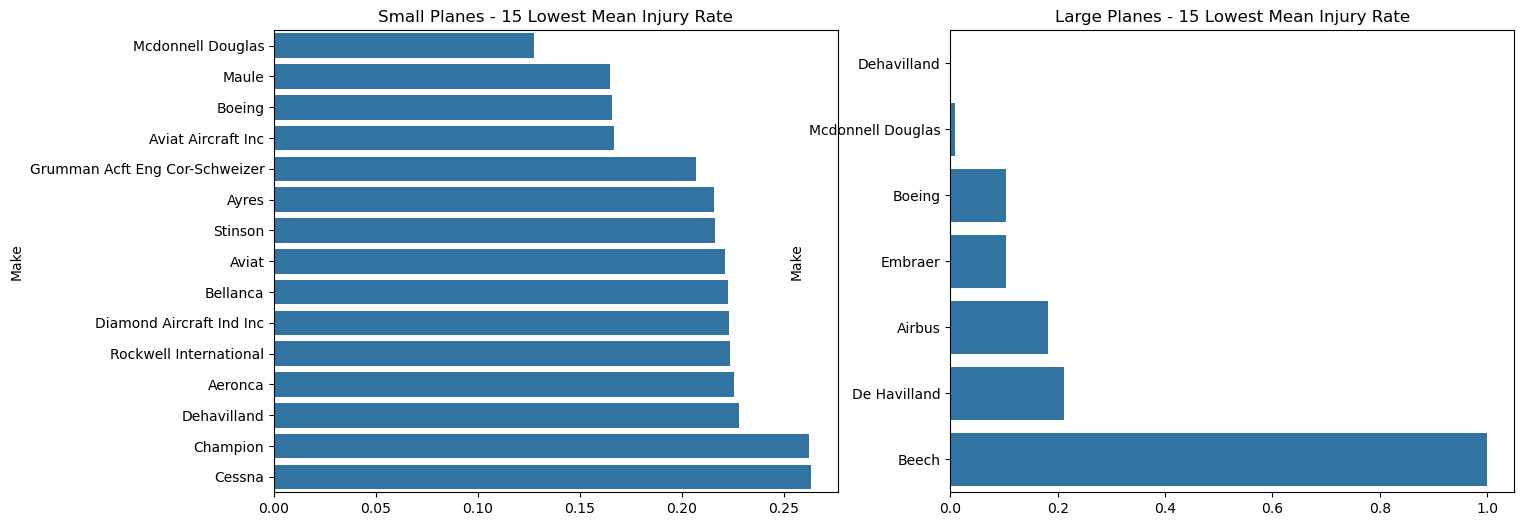

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

small_top15 = small_planes.groupby("Make")["Injury.Rate"].mean().nsmallest(15)
sns.barplot(x=small_top15.values, y=small_top15.index, ax=ax1)
ax1.set_title("Small Planes - 15 Lowest Mean Injury Rate")


large_top15 = large_planes.groupby("Make")["Injury.Rate"].mean().nsmallest(15)
sns.barplot(x=large_top15.values, y=large_top15.index, ax=ax2)
ax2.set_title("Large Planes - 15 Lowest Mean Injury Rate")

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

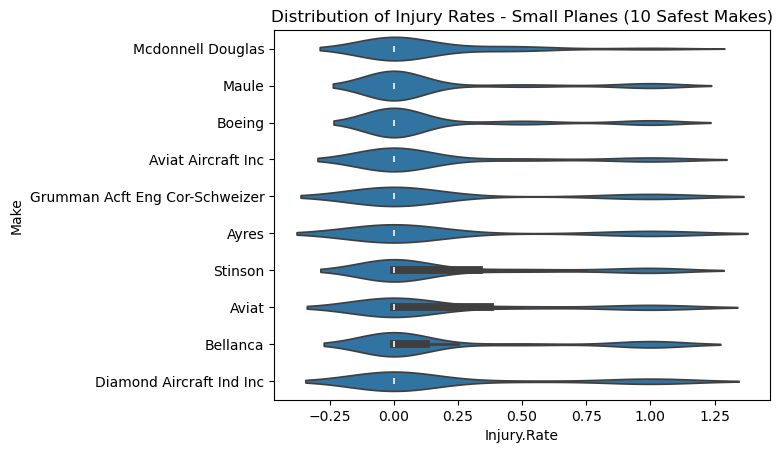

In [24]:
small_top10 = small_planes.groupby("Make")["Injury.Rate"].mean().nsmallest(10).index
small_violin_data = small_planes[small_planes["Make"].isin(small_top10)]

sns.violinplot(data=small_violin_data, x="Injury.Rate", y="Make",
                 order=small_planes.groupby("Make")["Injury.Rate"].mean().nsmallest(10).index)
plt.title("Distribution of Injury Rates - Small Planes (10 Safest Makes)")
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

<function matplotlib.pyplot.show(close=None, block=None)>

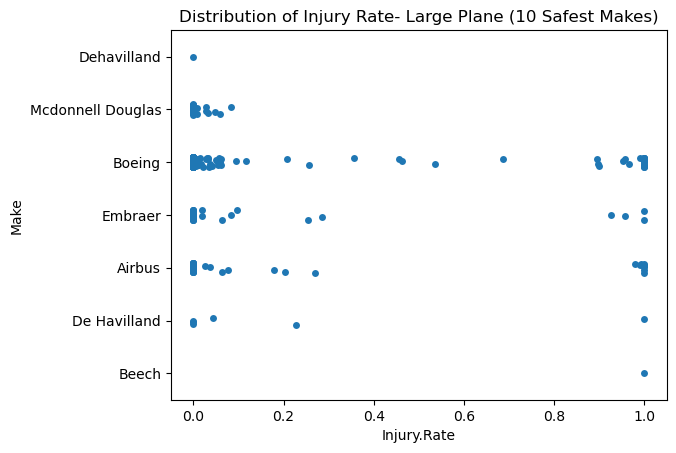

In [25]:
large_top10 = large_planes.groupby("Make")["Injury.Rate"].mean().nsmallest(10).index
large_stripplot_data = large_planes[large_planes["Make"].isin(large_top10)]

sns.stripplot(data=large_stripplot_data, x="Injury.Rate", y="Make", order=large_top10)
plt.title("Distribution of Injury Rate- Large Plane (10 Safest Makes)")
plt.show

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [26]:
small_destroyed = small_planes.groupby("Make")["Is.Destroyed"].mean().nsmallest(15)
print("Small Planes - 15 Lowest Destruction Rates by Make")
print(small_destroyed)
large_destroyed = large_planes.groupby("Make")["Is.Destroyed"].mean().nsmallest(15)
print("\nLarge Planes - 15 Lowest Destruction Rates by Make")
print(large_destroyed)


Small Planes - 15 Lowest Destruction Rates by Make
Make
Luscombe                          0.014493
Grumman Acft Eng Cor-Schweizer    0.017241
Stinson                           0.023256
Taylorcraft                       0.032258
Aeronca                           0.035000
Ercoupe                           0.038462
American Champion Aircraft        0.039216
Aviat Aircraft Inc                0.040000
Maule                             0.041860
Dehavilland                       0.044444
Bellanca                          0.050228
Diamond Aircraft Ind Inc          0.054054
Boeing                            0.068702
Champion                          0.076433
Airbus                            0.085714
Name: Is.Destroyed, dtype: float64

Large Planes - 15 Lowest Destruction Rates by Make
Make
Dehavilland          0.000000
Embraer              0.088889
Boeing               0.098940
Mcdonnell Douglas    0.111111
Airbus               0.166667
De Havilland         0.166667
Beech                1.0000

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [ ]:
small_injury = small_planes.groupby("Make")["Injury.Rate"].mean()
small_destroyed = small_planes.groupby("Make")["Is.Destroyed"].mean()
small_counts = small_planes.groupby("Make").size()

small_summary = pd.DataFrame({
      "Mean Injury Rate": small_injury,
      "Mean Destruction Rate": small_destroyed,
      "Accident Count": small_counts
  })
small_summary = small_summary[small_summary["Accident Count"] >= 50].sort_values("Mean Injury Rate")
print("Small Planes - Safety Summary by Make")
display(small_summary.head(10))

large_injury = large_planes.groupby("Make")["Injury.Rate"].mean()
large_destroyed = large_planes.groupby("Make")["Is.Destroyed"].mean()
large_counts = large_planes.groupby("Make").size()

large_summary = pd.DataFrame({
      "Mean Injury Rate": large_injury,
      "Mean Destruction Rate": large_destroyed,
      "Accident Count": large_counts
  })
large_summary = large_summary[large_summary["Accident Count"] >= 10].sort_values("Mean Injury Rate")
print("Large Planes- Safety Summary by Make")
display(large_summary.head(10))



### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [ ]:
large_model_counts = large_planes["Make.Model"].value_counts()
large_enough = large_model_counts[large_model_counts >= 10].index
large_filtered = large_planes[large_planes["Make.Model"].isin(large_enough)]
large_model_mean = large_filtered.groupby("Make.Model")["Injury.Rate"].mean().nsmallest(15)

sns.barplot(x=large_model_mean.values, y=large_model_mean.index)
plt.title("Large Planes - Lowest Mean Injury Rates by Model")
plt.xlabel("Mean Injury Rate")
plt.show()

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [ ]:
small_model_counts = small_planes["Make.Model"].value_counts()
small_enough = small_model_counts[small_model_counts >= 10].index
small_filtered = small_planes[small_planes["Make.Model"].isin(small_enough)]
small_model_mean = small_filtered.groupby("Make.Model")["Injury.Rate"].mean().nsmallest(10)

sns.barplot(x=small_model_mean.values, y=small_model_mean.index)
plt.title("Small Planes - 10 Lowest Mean Injury Rates by Model")
plt.xlabel("Mean Injury Rate")
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [ ]:
### Specific Airplane Types Discussion. 
The suggestion for the compnay is clear in the graphs, but note the following information is important to be aware of 

In [ ]:
print(f"Small planes mean injury rate: {small_planes['Injury.Rate'].mean():.4f}")
print(f"Large planes mean injury rate: {large_planes['Injury.Rate'].mean():.4f}")

print(f"\nSmall planes accident count: {len(small_planes)}")
print(f"Large planes accident count: {len(large_planes)}")



### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

In [ ]:
df_engines = df[df["Engine.Type"] != "Unknown"]
engine_injury = df_engines.groupby("Engine.Type")["Injury.Rate"].mean().sort_values()
engine_destroyed = df_engines.groupby("Engine.Type")["Is.Destroyed"].mean().sort_values()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=engine_injury.values, y=engine_injury.index, ax=ax1)
ax1.set_title("Mean Injury Rate by Engine Type")
ax1.set_xlabel("Mean Injury Rate")

sns.barplot(x=engine_destroyed.values, y=engine_destroyed.index, ax=ax2)
ax2.set_title("Mean Destruction Rate by Engine Type")
ax2.set_xlabel("Mean Destruction Rate")
plt.tight_layout()
plt.show()

engines_injury = df.groupby("Number.of.Engines")["Injury.Rate"].mean().sort_values()
engines_destroyed = df.groupby("Number.of.Engines")["Is.Destroyed"].mean().sort_values()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=engines_injury.index, y=engines_injury.values, ax=ax1)
ax1.set_title("Mean Injury Rate by Number of Engines")
ax1.set_xlabel("Number of Engines")
ax1.set_ylabel("Mean Injury Rate")

sns.barplot(x=engines_destroyed.index, y=engines_destroyed.values, ax=ax2)
ax2.set_title("Mean Destruction Rate by Number of Engines")
ax2.set_xlabel("Number of Engines")
ax2.set_ylabel("Mean Destruction Rate")

plt.tight_layout()
plt.show()

In [ ]:
###Engine type and Engine Number Anaylsis
Turbo Fan engines, commonly used in commercial jets, show significantly lower
injury rates compared to Reciprocating engines found in smaller aircraft. This
suggests that modern jet engine technology contributes to safer outcomes in
the event of an accident. 
The data on the number of engines does not give a significant snapshot,
but note that the majority of planes have 1 engine followed by 2 engines, so that makes it an important analysis. 

In [ ]:
df_engines = df[df["Engine.Type"] != "Unknown"]
engine_injury = df_engines.groupby("Engine.Type")["Injury.Rate"].mean().sort_values()
engine_destroyed = df_engines.groupby("Engine.Type")["Is.Destroyed"].mean().sort_values()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=engine_injury.values, y=engine_injury.index, ax=ax1)
ax1.set_title("Mean Injury Rate by Engine Type")
ax1.set_xlabel("Mean Injury Rate")

sns.barplot(x=engine_destroyed.values, y=engine_destroyed.index, ax=ax2)
ax2.set_title("Mean Destruction Rate by Engine Type")
ax2.set_xlabel("Mean Destruction Rate")
plt.tight_layout()
plt.show()

engines_injury = df.groupby("Number.of.Engines")["Injury.Rate"].mean().sort_values()
engines_destroyed = df.groupby("Number.of.Engines")["Is.Destroyed"].mean().sort_values()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=engines_injury.index, y=engines_injury.values, ax=ax1)
ax1.set_title("Mean Injury Rate by Number of Engines")
ax1.set_xlabel("Number of Engines")
ax1.set_ylabel("Mean Injury Rate")

sns.barplot(x=engines_destroyed.index, y=engines_destroyed.values, ax=ax2)
ax2.set_title("Mean Destruction Rate by Number of Engines")
ax2.set_xlabel("Number of Engines")
ax2.set_ylabel("Mean Destruction Rate")

plt.tight_layout()
plt.show()